<a href="https://colab.research.google.com/github/satriayyp/PCVK_Ganjil_2023/blob/main/SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# 1. Load Dataset
data = pd.read_csv("/content/drive/MyDrive/skripsi/Network_anomaly_data.csv")  # Ganti dengan lokasi file dataset Anda

# 2. Konversi Kolom Target menjadi Biner (Normal = 0, Serangan = 1)
data['attack'] = data['attack'].apply(lambda x: 1 if x != 'normal' else 0)

# 3. Periksa Kolom Kategorikal dan Encode (Jika Ada)
if 'protocoltype' in data.columns:
    encoder = LabelEncoder()
    data['protocoltype'] = encoder.fit_transform(data['protocoltype'])
if 'flag' in data.columns:
    data['flag'] = encoder.fit_transform(data['flag'])

# 4. Pilih Fitur dan Label
features = [
    'duration', 'srcbytes', 'dstbytes', 'protocoltype', 'flag',
    'serrorrate', 'rerrorrate', 'samesrvrate', 'diffsrvrate'
]
X = data[features]
y = data['attack']

# 5. Normalisasi Fitur
scaler = StandardScaler()
X = scaler.fit_transform(X)

# 6. Pisahkan Data Menjadi Training dan Testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 7. Inisialisasi dan Latih Model SVM
svm_model = SVC(kernel='rbf', C=1.0, gamma='scale')
svm_model.fit(X_train, y_train)

# 8. Prediksi pada Data Uji
y_pred = svm_model.predict(X_test)

# 9. Evaluasi Model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nAccuracy Score:")
print(accuracy_score(y_test, y_pred))


Confusion Matrix:
[[13206   216]
 [  819 10954]]

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.98      0.96     13422
           1       0.98      0.93      0.95     11773

    accuracy                           0.96     25195
   macro avg       0.96      0.96      0.96     25195
weighted avg       0.96      0.96      0.96     25195


Accuracy Score:
0.9589204207183966


menamplkan confusion matrix

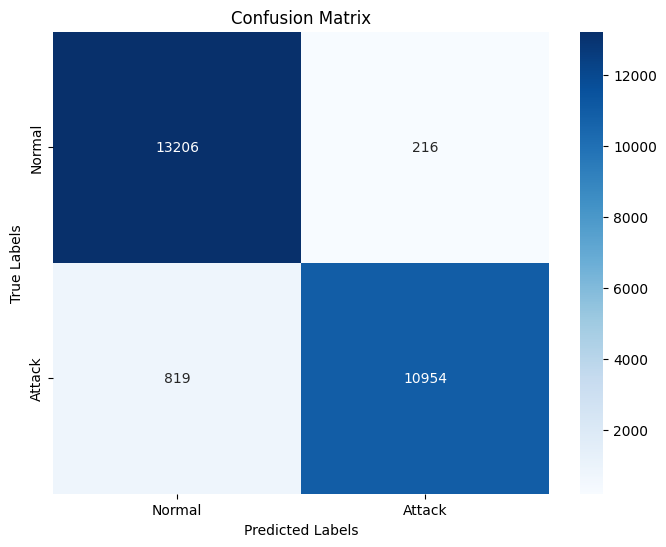

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

# Membuat Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Visualisasi dengan heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Normal", "Attack"], yticklabels=["Normal", "Attack"])
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()


menampilkan klasifikasi matrix

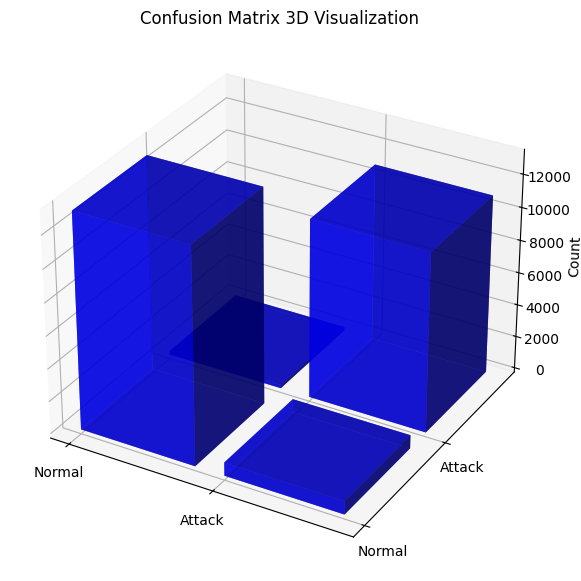

In [11]:
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# Data untuk 3D plot
cm = confusion_matrix(y_test, y_pred)
x = ["Normal", "Attack"]
y = ["Normal", "Attack"]
z = cm.flatten()

# Membuat grid
xpos, ypos = np.meshgrid(range(len(x)), range(len(y)), indexing="ij")
xpos = xpos.flatten()
ypos = ypos.flatten()
zpos = np.zeros_like(xpos)

# Bar plot 3D
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
dx = dy = 0.8
dz = z

ax.bar3d(xpos, ypos, zpos, dx, dy, dz, color="blue", alpha=0.7)
ax.set_xticks(range(len(x)))
ax.set_xticklabels(x)
ax.set_yticks(range(len(y)))
ax.set_yticklabels(y)
ax.set_zlabel("Count")
ax.set_title("Confusion Matrix 3D Visualization")
plt.show()


Classification Report as Table:
              precision    recall  f1-score      support
0              0.941604  0.983907  0.962291  13422.00000
1              0.980662  0.930434  0.954888  11773.00000
accuracy       0.958920  0.958920  0.958920      0.95892
macro avg      0.961133  0.957171  0.958590  25195.00000
weighted avg   0.959855  0.958920  0.958832  25195.00000


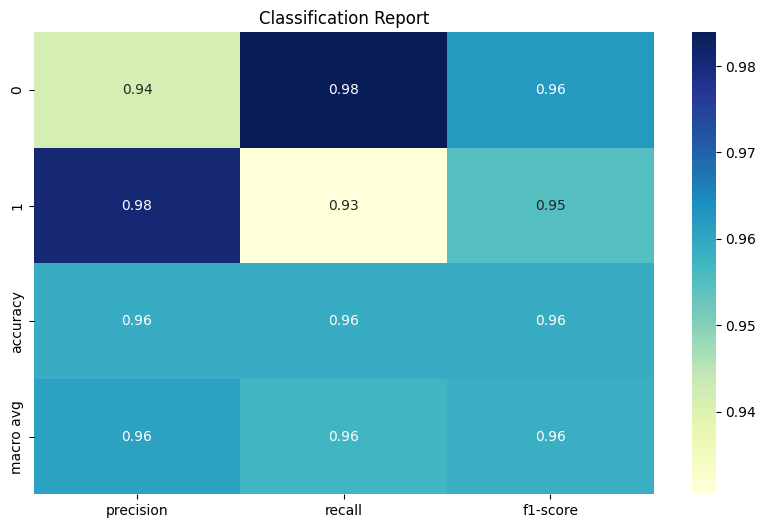

In [4]:
# Classification Report ke dalam DataFrame
report = classification_report(y_test, y_pred, output_dict=True)
report_df = pd.DataFrame(report).transpose()

# Menampilkan tabel
print("Classification Report as Table:")
print(report_df)

# Jika ingin visualisasi tabel menggunakan matplotlib
fig, ax = plt.subplots(figsize=(10, 6))
sns.heatmap(report_df.iloc[:-1, :-1], annot=True, cmap="YlGnBu", fmt=".2f")
plt.title("Classification Report")
plt.show()


visualisasi fitur dalam dataset


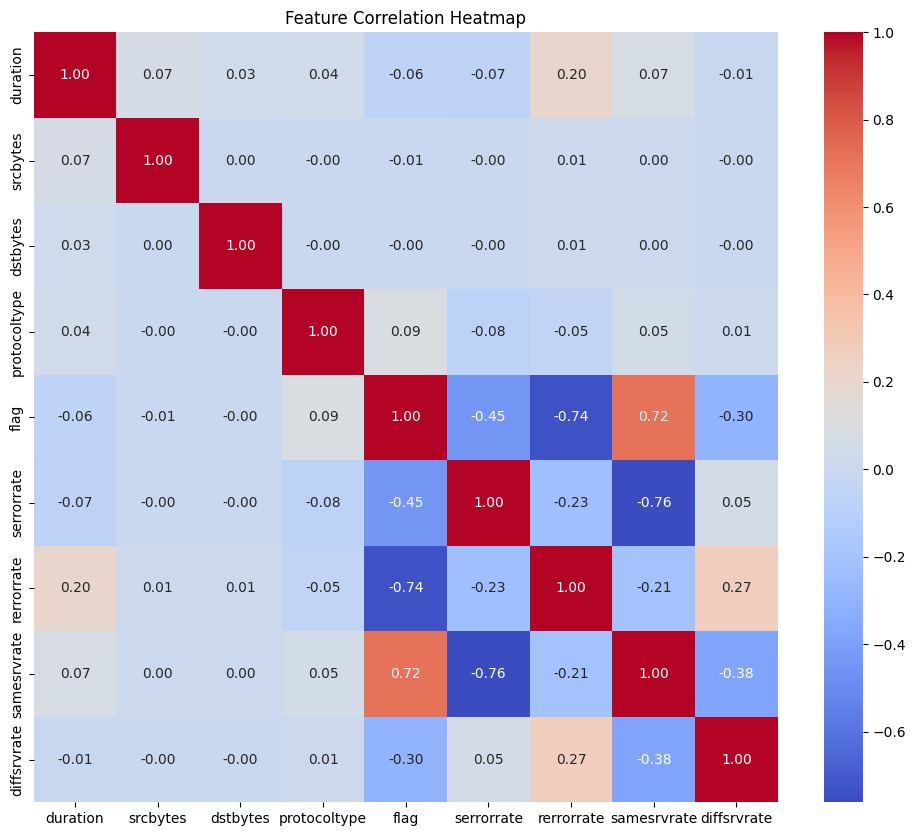

In [14]:
# Heatmap Korelasi
plt.figure(figsize=(12, 10))
correlation_matrix = data[features].corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()


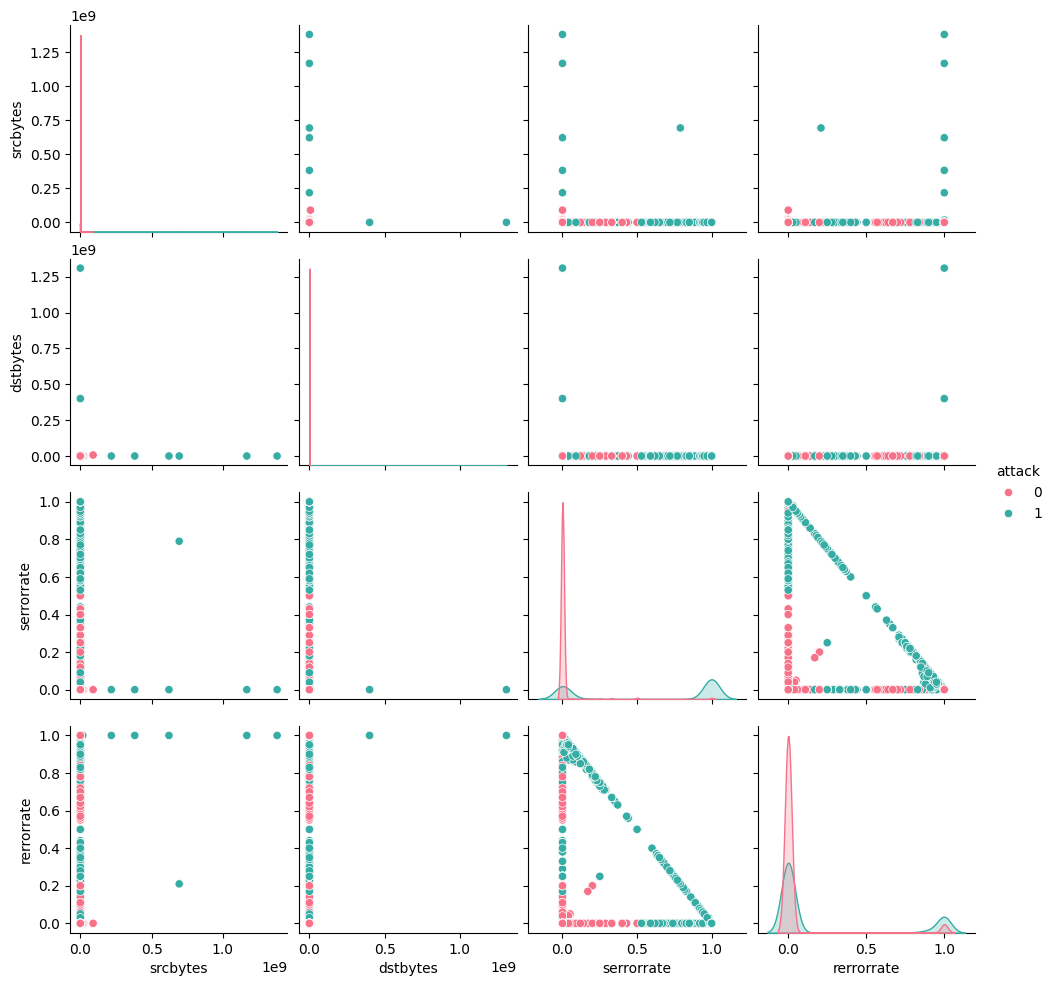

In [16]:
# Pairplot untuk beberapa fitur
sns.pairplot(data=data, vars=['srcbytes', 'dstbytes', 'serrorrate', 'rerrorrate'], hue='attack', palette="husl")
plt.show()


menampilkan data test dan data train

In [9]:
# Menampilkan beberapa baris data latih
train_data = pd.DataFrame(X_train, columns=features)
train_data['attack'] = y_train.values

print("Sample of Training Data:")
print(train_data.head())

# Menampilkan beberapa baris data uji
test_data = pd.DataFrame(X_test, columns=features)
test_data['attack'] = y_test.values

print("\nSample of Test Data:")
print(test_data.head())

from tabulate import tabulate

# Data latih sebagai tabel
train_data = pd.DataFrame(X_train, columns=features)
train_data['attack'] = y_train.values

print("Training Data Table:")
print(tabulate(train_data.head(), headers='keys', tablefmt='grid'))

# Data uji sebagai tabel
test_data = pd.DataFrame(X_test, columns=features)
test_data['attack'] = y_test.values

print("\nTest Data Table:")
print(tabulate(test_data.head(), headers='keys', tablefmt='grid'))


Sample of Training Data:
   duration  srcbytes  dstbytes  protocoltype      flag  serrorrate  \
0 -0.110249 -0.007726 -0.001204     -0.124706  0.751111   -0.637209   
1 -0.110249 -0.007762 -0.004919     -0.124706 -0.736235    1.602664   
2 -0.110249 -0.007762 -0.004919     -0.124706 -2.223581   -0.637209   
3 -0.110249 -0.007718 -0.004854     -0.124706  0.751111   -0.637209   
4 -0.110249 -0.007674 -0.004918      2.219312  0.751111   -0.637209   

   rerrorrate  samesrvrate  diffsrvrate  attack  
0   -0.374362     0.771283    -0.349683       0  
1   -0.374362    -1.480656    -0.016930       1  
2    2.746403    -1.435162    -0.016930       1  
3   -0.374362     0.771283    -0.349683       0  
4   -0.374362     0.771283    -0.349683       0  

Sample of Test Data:
   duration  srcbytes  dstbytes  protocoltype      flag  serrorrate  \
0 -0.110249 -0.007756 -0.004919      2.219312  0.751111   -0.637209   
1 -0.110249 -0.007762 -0.004919     -0.124706 -0.736235    1.602664   
2 -0.110249 -

menampilkan data support vector

Support Vectors:
   duration  srcbytes  dstbytes  protocoltype      flag  serrorrate  \
0 -0.110249 -0.007617 -0.004919     -0.124706  0.751111   -0.637209   
1 -0.110249 -0.007555 -0.004919     -0.124706  0.751111   -0.637209   
2 -0.110249 -0.007723 -0.004856     -0.124706  0.751111   -0.637209   
3 -0.110249 -0.007755 -0.004898      2.219312  0.751111   -0.637209   
4 -0.110249 -0.007755 -0.004885      2.219312  0.751111   -0.637209   

   rerrorrate  samesrvrate  diffsrvrate  
0   -0.374362     0.771283    -0.349683  
1   -0.374362     0.771283    -0.349683  
2   -0.374362     0.771283    -0.349683  
3   -0.374362     0.748536    -0.238765  
4   -0.374362     0.748536    -0.294224  

Indices of Support Vectors:
[    38     44     49 ... 100704 100713 100737]


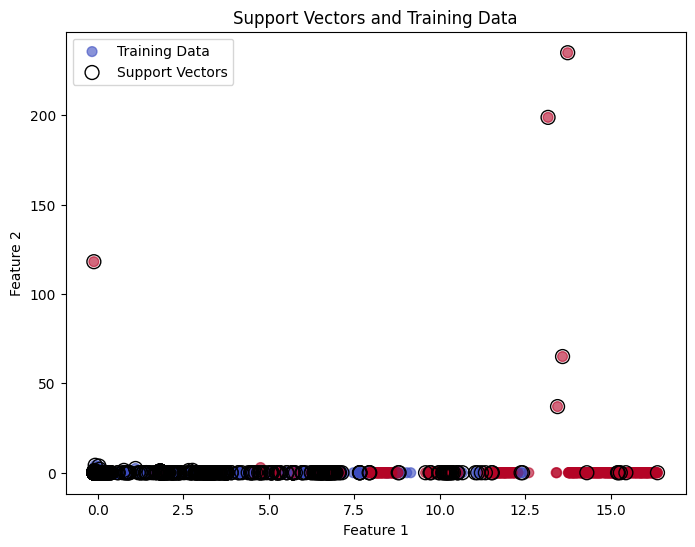

In [13]:
# Mendapatkan support vectors
support_vectors = svm_model.support_vectors_

# Membuat DataFrame untuk support vectors
support_vectors_df = pd.DataFrame(support_vectors, columns=features)
print("Support Vectors:")
print(support_vectors_df.head())

# Jika ingin mengetahui indeks support vectors
print("\nIndices of Support Vectors:")
print(svm_model.support_)

# Plot fitur pertama (X1) dan kedua (X2) bersama Support Vectors
plt.figure(figsize=(8, 6))
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='coolwarm', s=50, alpha=0.6, label="Training Data")
plt.scatter(svm_model.support_vectors_[:, 0], svm_model.support_vectors_[:, 1], edgecolors='k', facecolors='none', s=100, label="Support Vectors")
plt.title("Support Vectors and Training Data")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()


menampilkan data prediksi

Predictions vs True Labels:
       True Label  Predicted Label
378             0                0
32038           1                1
86399           1                1
74412           1                1
52951           1                1


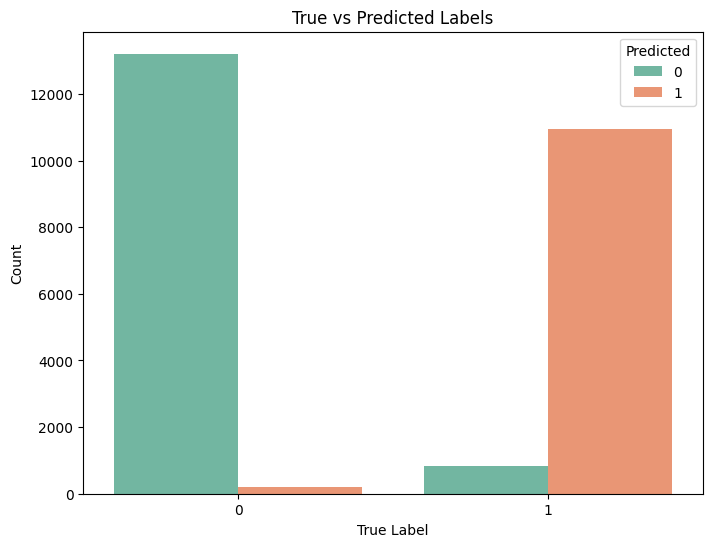

In [8]:
# Membuat DataFrame untuk hasil prediksi
predictions_df = pd.DataFrame({'True Label': y_test, 'Predicted Label': y_pred})
print("Predictions vs True Labels:")
print(predictions_df.head())

# Distribusi True Label vs Predicted Label
plt.figure(figsize=(8, 6))
true_vs_pred = pd.DataFrame({'True Label': y_test, 'Predicted Label': y_pred})
sns.countplot(data=true_vs_pred, x='True Label', hue='Predicted Label', palette="Set2")
plt.title("True vs Predicted Labels")
plt.xlabel("True Label")
plt.ylabel("Count")
plt.legend(title="Predicted")
plt.show()
